# California Housing

## Imports

In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mltoolkit.utils import dump_keras_model

## Functions

In [41]:
def dump_csv(dic:dict,path:str="Datasets\\Raw Data\\",**kwargs):
    '''
    Dump multiple 2d-arrays as CSV format at once.
    '''
    for filename,file in dic.items():
        if type(file) is pd.DataFrame:
            file.to_csv(path+filename+".csv",**kwargs)
        elif type(file) is np.ndarray:
            pd.DataFrame(file).to_csv(path+filename+".csv",**kwargs)
        else:
            raise TypeError("Only DataFrame and 2d-array are acceptable as the " +
                            "content of the passed in dictionary.")

In [102]:
def nn_learning_curve(history,name:str=""):
    '''
    Plot the learning curve from the history object returned from TensorFlow
    Neural Networks model fitting.
    '''
    ylabel = '/'.join(list(history.history.keys())[:len(history.history)//2])
    title = name+" Learning Curve" if name else "Learning Curve"
    pd.DataFrame(history.history).plot(title=title,
                                       xlabel="epoch",
                                       ylabel=ylabel)
    plt.show()

## Loading Dataset

In [3]:
housing_raw = fetch_california_housing()

In [7]:
X_train_raw,X_test,y_train_raw,y_test = train_test_split(housing_raw.data,housing_raw.target)

In [8]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_raw,y_train_raw)

In [9]:
X_train.shape,X_valid.shape,X_test.shape,y_train.shape,y_valid.shape,y_test.shape

((11610, 8), (3870, 8), (5160, 8), (11610,), (3870,), (5160,))

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Saving Datasets

In [44]:
joblib.dump(housing_raw,"Datasets\\Raw Data\\housing_raw.pkl",compress=9)

['Datasets\\Raw Data\\housing_raw.pkl']

In [43]:
csvs = {
    "X_train":X_train,
    "X_valid":X_valid,
    "X_test":X_test,
    "y_train":y_train,
    "y_valid":y_valid,
    "y_test":y_test,
}
dump_csv(csvs,index=False,encoding='utf-8')

## First Insights

In [56]:
print(housing_raw.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [54]:
housing_df = pd.concat((pd.DataFrame(housing_raw.data,columns=housing_raw.feature_names),pd.DataFrame(housing_raw.target,columns=housing_raw.target_names)),axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
housing_df.MedHouseVal.mean()

2.068558169089147

In [62]:
housing_df.corr().style.background_gradient()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


We can see that Median Income, House Age, Average Rooms holds positive relationship with Median Housing Price.\
While the rest desn't show much linear correlation.

## MLP Regression Model

In [67]:
model = keras.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=(X_train.shape[1:])),
    keras.layers.Dense(1)
])

In [73]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(
    loss='mean_squared_error',
    metrics=['mean_squared_error'],
    optimizer=optimizer
)

In [74]:
history = model.fit(X_train,y_train,epochs=30,batch_size=500,validation_data=(X_valid,y_valid))

Epoch 1/30
24/24 [==============================] - 2s 13ms/step - loss: 0.9924 - mean_squared_error: 0.9924 - val_loss: 1.2237 - val_mean_squared_error: 1.2237
Epoch 2/30
24/24 [==============================] - 0s 7ms/step - loss: 0.9252 - mean_squared_error: 0.9252 - val_loss: 0.6952 - val_mean_squared_error: 0.6952
Epoch 3/30
24/24 [==============================] - 0s 7ms/step - loss: 0.5141 - mean_squared_error: 0.5141 - val_loss: 0.5074 - val_mean_squared_error: 0.5074
Epoch 4/30
24/24 [==============================] - 0s 7ms/step - loss: 0.4680 - mean_squared_error: 0.4680 - val_loss: 0.5151 - val_mean_squared_error: 0.5151
Epoch 5/30
24/24 [==============================] - 0s 7ms/step - loss: 0.4715 - mean_squared_error: 0.4715 - val_loss: 0.4646 - val_mean_squared_error: 0.4646
Epoch 6/30
24/24 [==============================] - 0s 7ms/step - loss: 0.4317 - mean_squared_error: 0.4317 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 7/30
24/24 [=====================

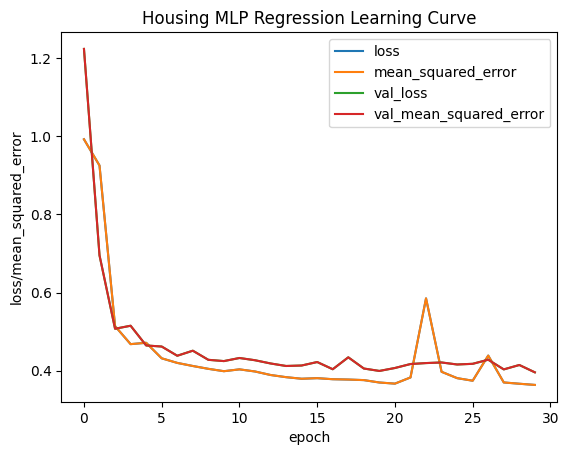

In [101]:
nn_learning_curve(history,"Housing MLP Regression")

### Test Evaluation

In [103]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3735 - mean_squared_error: 0.3735


[0.3735188841819763, 0.3735188841819763]

In [112]:
mse_test = Out[103][0]

In [114]:
rmse_test = np.sqrt(mse_test)
rmse_test

0.6111619132292001

### Predictions

In [104]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[1.58763  ],
       [2.4528127],
       [1.2994392],
       [2.4070058],
       [2.0249162]], dtype=float32)

In [105]:
y_test[:5]

array([1.455, 2.431, 1.469, 2.356, 1.509])

### Saving the Model

In [115]:
scores = {
    "MSE":mse_test,
    "RMSE":rmse_test
}

In [117]:
dump_keras_model(model,scores=scores)

INFO:tensorflow:Assets written to: Trained Models\2022-08-28_10-18-29_sequential\assets


## Conclusion

The model does not perform as well as expected, there is rooms for improvement in prediction accuracy.\
Mean MedHouseVal: 2.0686\
RMSE: 0.6111

This means that the predicted housing price is averagely about 30% off from the actual housing value.\
As we can notice that the train and validation loss are close together, it is likely that the model is somewhat underfitting the data.\
We can increase the complexity of the model (increasing layers, increasing neurons per layer, change activation functon, change loss function etc).